# Wind Speed Predictor

The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were provided.


**Attribute Information**

* DATE (YYYY-MM-DD)
* WIND: Average wind speed (knots)
* IND: First indicator value
* RAIN: Precipitation Amount (mm)
* IND.1: Second indicator value
* T.MAX: Maximum Temperature (°C)
* IND.2: Third indicator value
* T.MIN: Minimum Temperature (°C)
* T.MIN.G: 09utc Grass Minimum Temperature (°C)


Data Source: https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os



# Importing Data

In [52]:
df = pd.read_csv("./wind_dataset.csv")

In [56]:
from sklearn.preprocessing import MinMaxScaler
import pickle
wind_scaler = MinMaxScaler()
df["WIND"]
wind_scaler.fit_transform(df[["WIND"]] )
with open("wind_scaler.pkl", "wb") as f:
    pickle.dump(wind_scaler, f)

In [28]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


# Cleaning Up Data

In [31]:
# We need to convert the DATE dtype from object to a datetime

df['DATE'] = pd.to_datetime(df['DATE'])

#df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [32]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,MONTH,DAY
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,1,1
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,1,2
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,1,3
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,1,4
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1,5


In [33]:
# Removing the original date column
df = df.drop(['DATE'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   IND      6574 non-null   int64  
 2   RAIN     6574 non-null   float64
 3   IND.1    6513 non-null   float64
 4   T.MAX    5953 non-null   float64
 5   IND.2    6513 non-null   float64
 6   T.MIN    5900 non-null   float64
 7   T.MIN.G  6214 non-null   float64
 8   MONTH    6574 non-null   int64  
 9   DAY      6574 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 513.7 KB


In [35]:
# Check for null values

df.isnull().sum().sum()

1777

<AxesSubplot:>

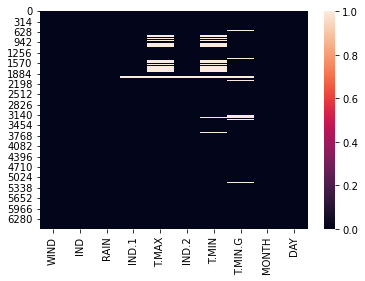

In [36]:
sns.heatmap(df.isnull())

In [37]:
df.isna().sum()

WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
MONTH        0
DAY          0
dtype: int64

In [38]:
# Filling these Values with 0

df.fillna(df.median()[0], inplace=True)
df.isnull().sum().sum()

0

# Visualization

<AxesSubplot:>

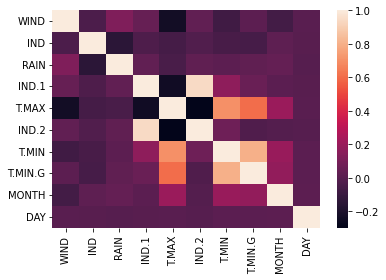

In [39]:
sns.heatmap(df.corr())

As we can see that the wind is more positively correlated to rain

# Machine Learning

Since this is a Regression Problem and we need to predict Average Wind Speed, we'll be using:
* Linear Regression
* Decision Tree
* Random Forest

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

ValueError: Expected 2D array, got 1D array instead:
array=[0.45011525 0.37866315 0.37043135 ... 0.63121501 0.59532433 0.63384919].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
df.head()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,MONTH,DAY
0,0.450115,0.0,0.002985,0.0,0.356877,0.000000,0.515254,0.443709,0.0,0.000000
1,0.378663,0.0,0.076119,0.0,0.271375,0.000000,0.532203,0.513245,0.0,0.033333
2,0.370431,0.0,0.005970,0.0,0.208178,0.000000,0.406780,0.460265,0.0,0.066667
3,0.284162,0.0,0.002985,0.0,0.211896,0.000000,0.403390,0.370861,0.0,0.100000
4,0.392493,0.0,0.155224,0.0,0.271375,0.108578,0.338983,0.228477,0.0,0.133333


In [42]:
X = df.drop(['WIND'], axis=1)
y = df['WIND']

In [48]:
print(df["DAY"].max())

0.9999999999999999


In [44]:
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

with open("data.npy", "wb+") as f:
    np.savez(f, X_train=X_train, X_test = X_test, Y_train = y_train, Y_test = y_test)
    _ = f.seek(0)
    npzfile = np.load(f)
    print(sorted(npzfile.files))

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

['X_test', 'X_train', 'Y_test', 'Y_train']
Training dataset shape: (4404, 9) (4404,)
Testing dataset shape: (2170, 9) (2170,)


In [16]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, lin_pred))
print('MSE:', metrics.mean_squared_error(y_test, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))

MAE: 3.83273357468741
MSE: 22.829796000497772
RMSE: 4.778053578654991


In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 4.7422811059907835
MSE: 37.32705
RMSE: 6.109586729067687


In [18]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 3.7144016440301515
MSE: 21.72861596094446
RMSE: 4.661396353126867


Since Random Forest Regressor has lower values in metrics than the others, therefore it seems like a better model for our data